# Diabetes analysis
Data analysis based on diabetes.csv downloaded from Kaggle. <br>
Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


Diabetes is a metabolic disorder characterising in high glucose level in blood. It results from wrong insulin production or its wrong metabolism in cells. 

The goal of this analysis is to create a model which would predict if the person has diabetes or not based on some blood and person's parameters. This is my second analysis for the same database but this time I will exclude some of the data from further analysis to see what happens.

# Import and prepare the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('FILES/diabetes.csv', sep=',')
data.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
213            0      140             65             26      130  42.6   
692            2      121             70             32       95  39.1   
69             4      146             85             27      100  28.9   
586            8      143             66              0        0  34.9   
114            7      160             54             32      175  30.5   
327           10      179             70              0        0  35.1   
730            3      130             78             23       79  28.4   
578           10      133             68              0        0  27.0   
520            2       68             70             32       66  25.0   
301            2      144             58             33      135  31.6   

     DiabetesPedigreeFunction  Age  Outcome  
213                     0.431   24        1  
692                     0.886   23        0  
69                      0.189   27        0  
586                     0.129   41        1  
114                     0.588   39        1  
327                     0.200   37        0  
730                     0.323   34        1  
578                     0.245   36        0  
520                     0.187   25        0  
301                     0.422   25        1

The code above simply reads the .csv file and stores the data in data variable. Now let's take a look on the data and count NaNs or 0 values.

In [2]:
# describing the dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [3]:
# checking information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# checking how many of each columns are 0's
for c in data.columns:
    print(c + ': ' + str(data[data[c] == 0][c].count()))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There can be women with no pregnancies, but data for Glucose, BloodPressure, SkinThickness, Insulin and BMI is incomplete.<br>Now let's see how many patients did have diabetes.

In [6]:
# outcome count:
data['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

OK, so now we know that 65% of dataset did not have diabetes against 35% who had. I assume that people who had diabetes have different values of parameters than people who did not have it. That is why I change 0's with median for corresponding value. But, as there is too many NaN's in SkinThickness and Insulin, I will not take them into further consideration.

In [7]:
# removing SkinThickness and Insulin from further analysis
data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [8]:
# changing 0's to NaN so that they do not change the median value
for c in ['Glucose', 'BloodPressure', 'BMI']:
    data[c].replace(0, np.NaN, inplace=True)

In [9]:
# check if correct number of cells has been changed
data.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [10]:
# how it looks in dataframe
data.sample(10)

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
168            4    110.0           66.0  31.9                     0.471   29   
8              2    197.0           70.0  30.5                     0.158   53   
419            3    129.0           64.0  26.4                     0.219   28   
537            0     57.0           60.0  21.7                     0.735   67   
411            1    112.0           72.0  34.4                     0.528   25   
322            0    124.0           70.0  27.4                     0.254   36   
238            9    164.0           84.0  30.8                     0.831   32   
227            3    162.0           52.0  37.2                     0.652   24   
434            1     90.0           68.0  24.5                     1.138   36   
343            5    122.0           86.0  34.7                     0.290   33   

     Outcome  
168        0  
8          1  
419        1  
537        0  
411        0  
322        1  
238        1  
227        1  
434        0  
343        0

In [11]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  \
Outcome                                                                        
0                2.0    107.0           70.0  30.1                     0.336   
1                4.0    140.0           74.5  34.3                     0.449   

          Age  
Outcome        
0        27.0  
1        36.0

In [12]:
# change NaN's to corresponding median
for c in ['Glucose', 'BloodPressure', 'BMI']:
    data.loc[(data['Outcome'] == 0) & (data[c].isnull()), c] = data[data['Outcome'] == 0][c].median() 
    data.loc[(data['Outcome'] == 1) & (data[c].isnull()), c] = data[data['Outcome'] == 1][c].median() 
data.isnull().sum()             

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  \
Outcome                                                                        
0                2.0    107.0           70.0  30.1                     0.336   
1                4.0    140.0           74.5  34.3                     0.449   

          Age  
Outcome        
0        27.0  
1        36.0

In [14]:
data.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.622000  ...                  0.56175  2.329  500.0  31.190000   
1        142.302239  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 48 columns]

# Data visualisation

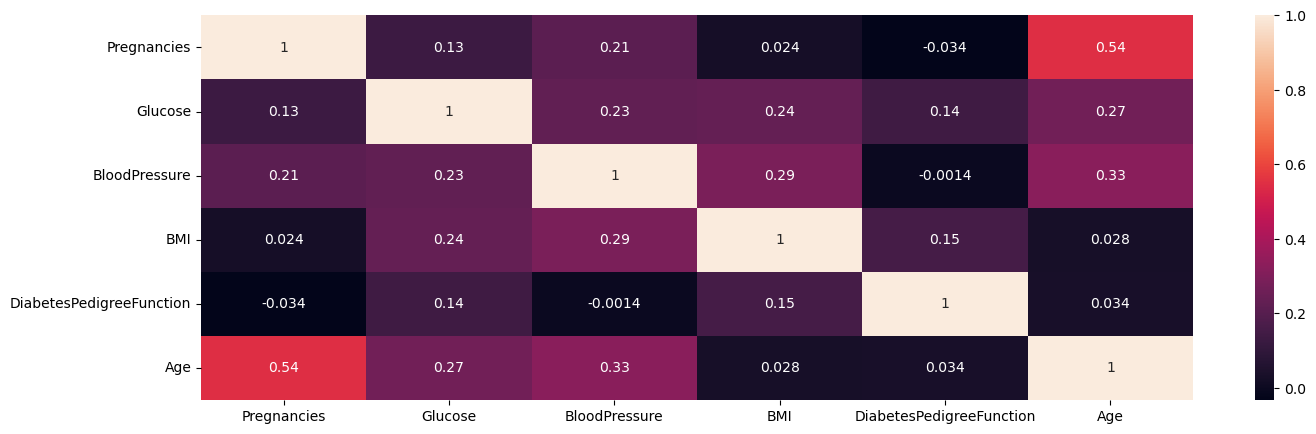

In [15]:
corrMatrix = data.iloc[:,0:6].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

From correlation matrix we see that there is a high correlation between Age and Pregnancies (0.54). Let's see how these parameters look on a scatter plot.

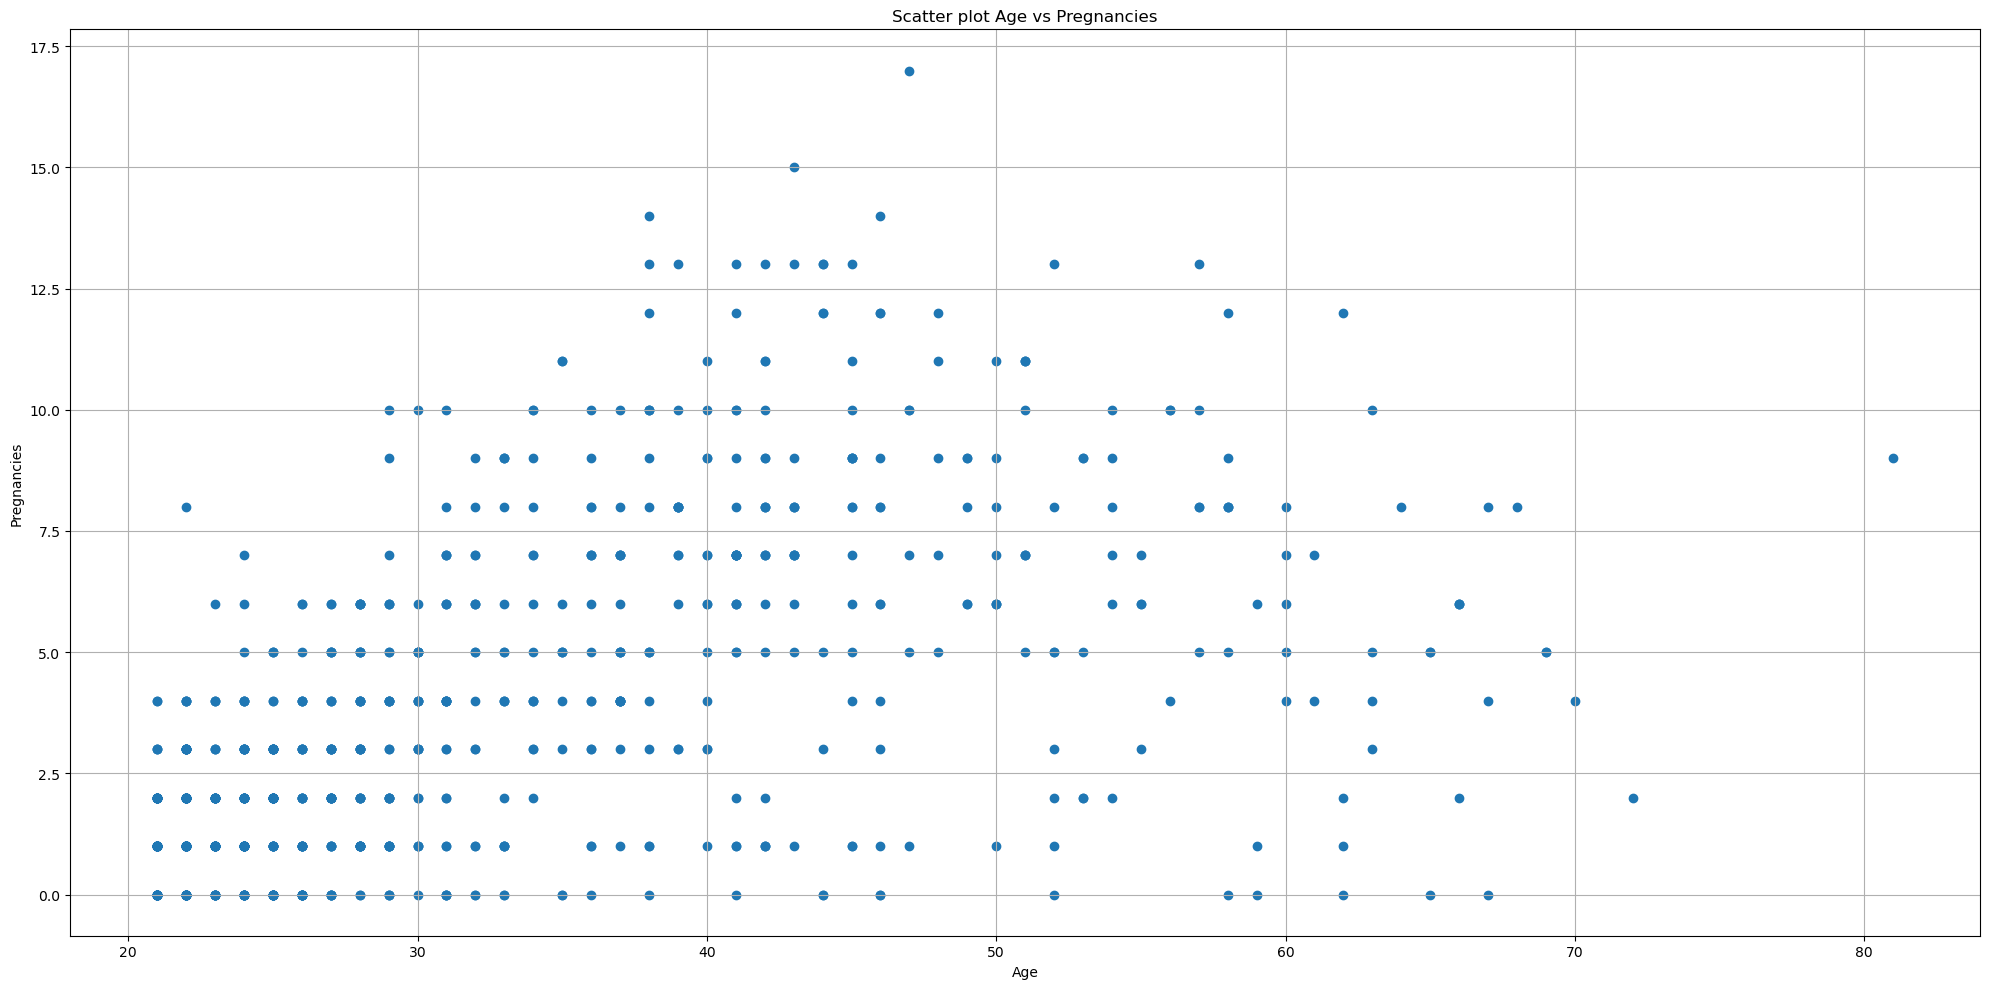

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['Age'], y=data['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies')
plt.tight_layout() 
plt.show()

Maybe it will be good to see the scatter plots for each outcome separately. 

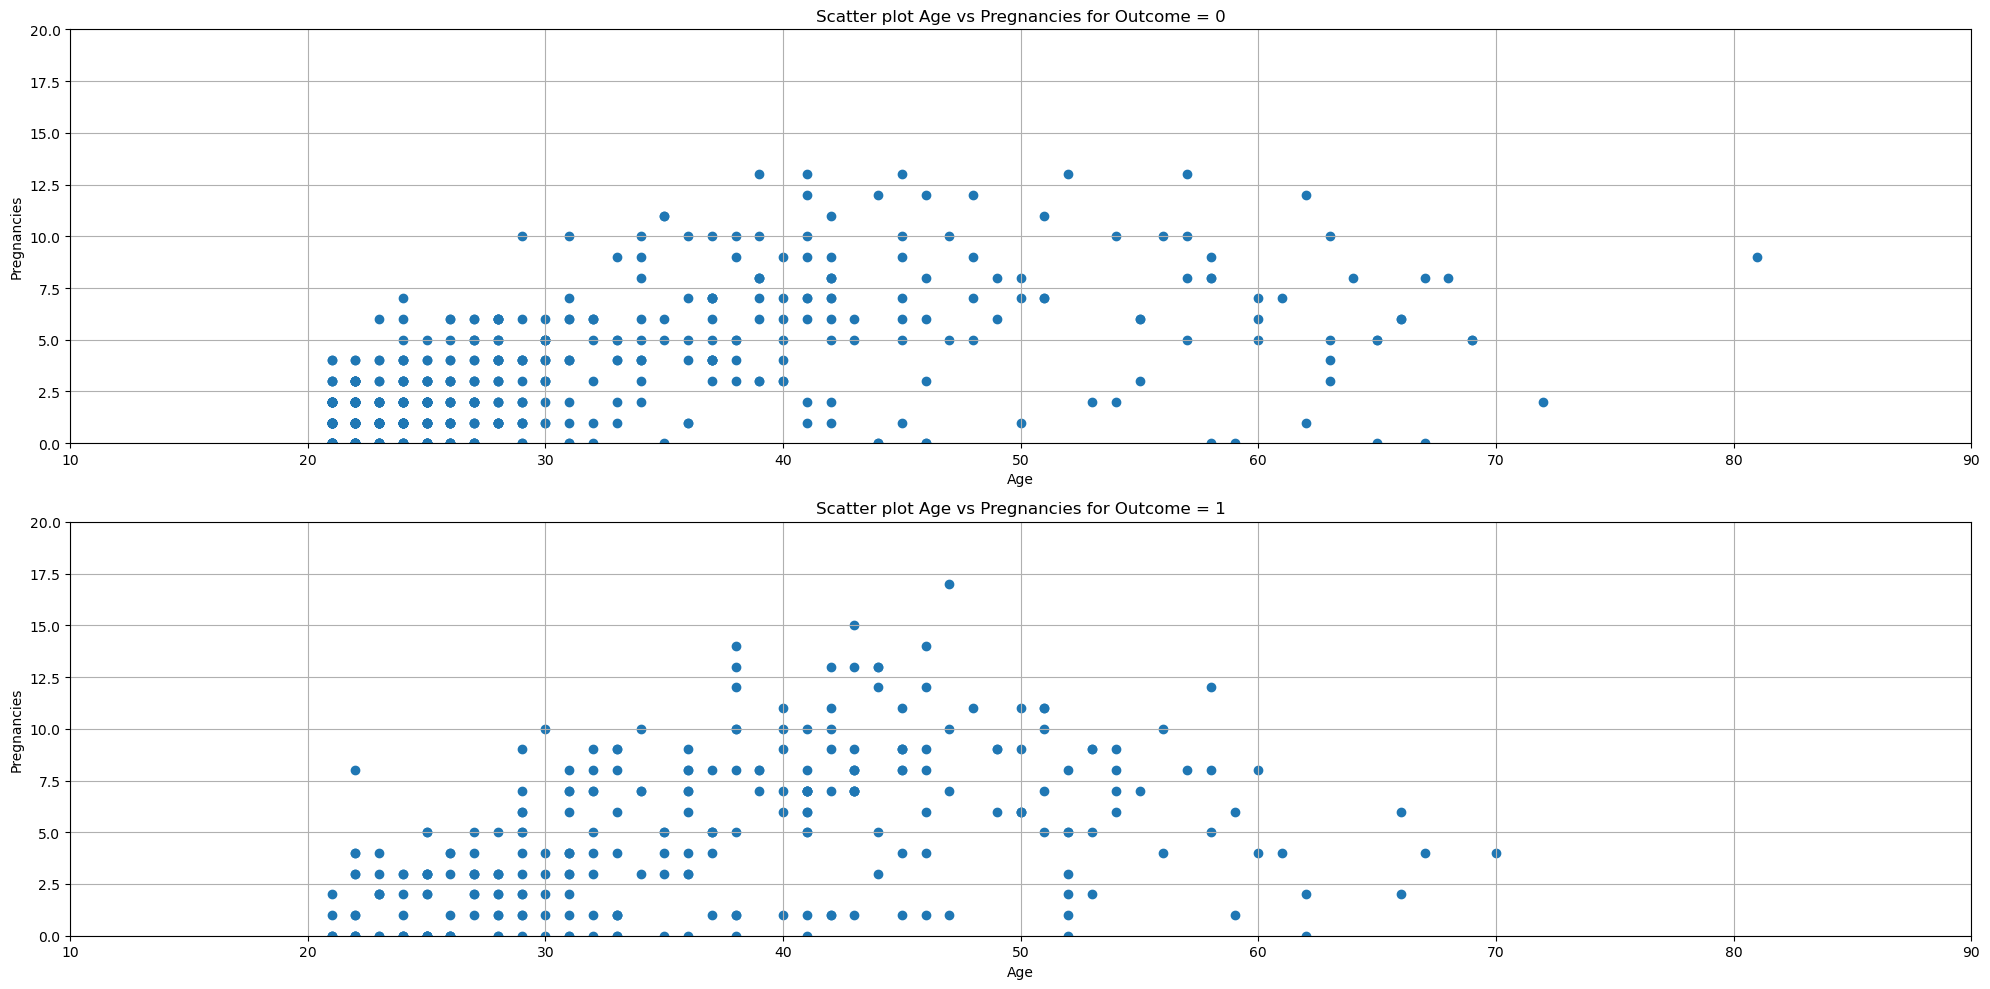

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(211) 
plt.scatter(x=data[data['Outcome'] == 0]['Age'], y=data[data['Outcome'] == 0]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 0')

plt.subplot(212) 
plt.scatter(x=data[data['Outcome'] == 1]['Age'], y=data[data['Outcome'] == 1]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 1')

plt.tight_layout() 
plt.show()

We can see also histograms for each parameter but separately for Outcome = 1 and Outcome = 0.

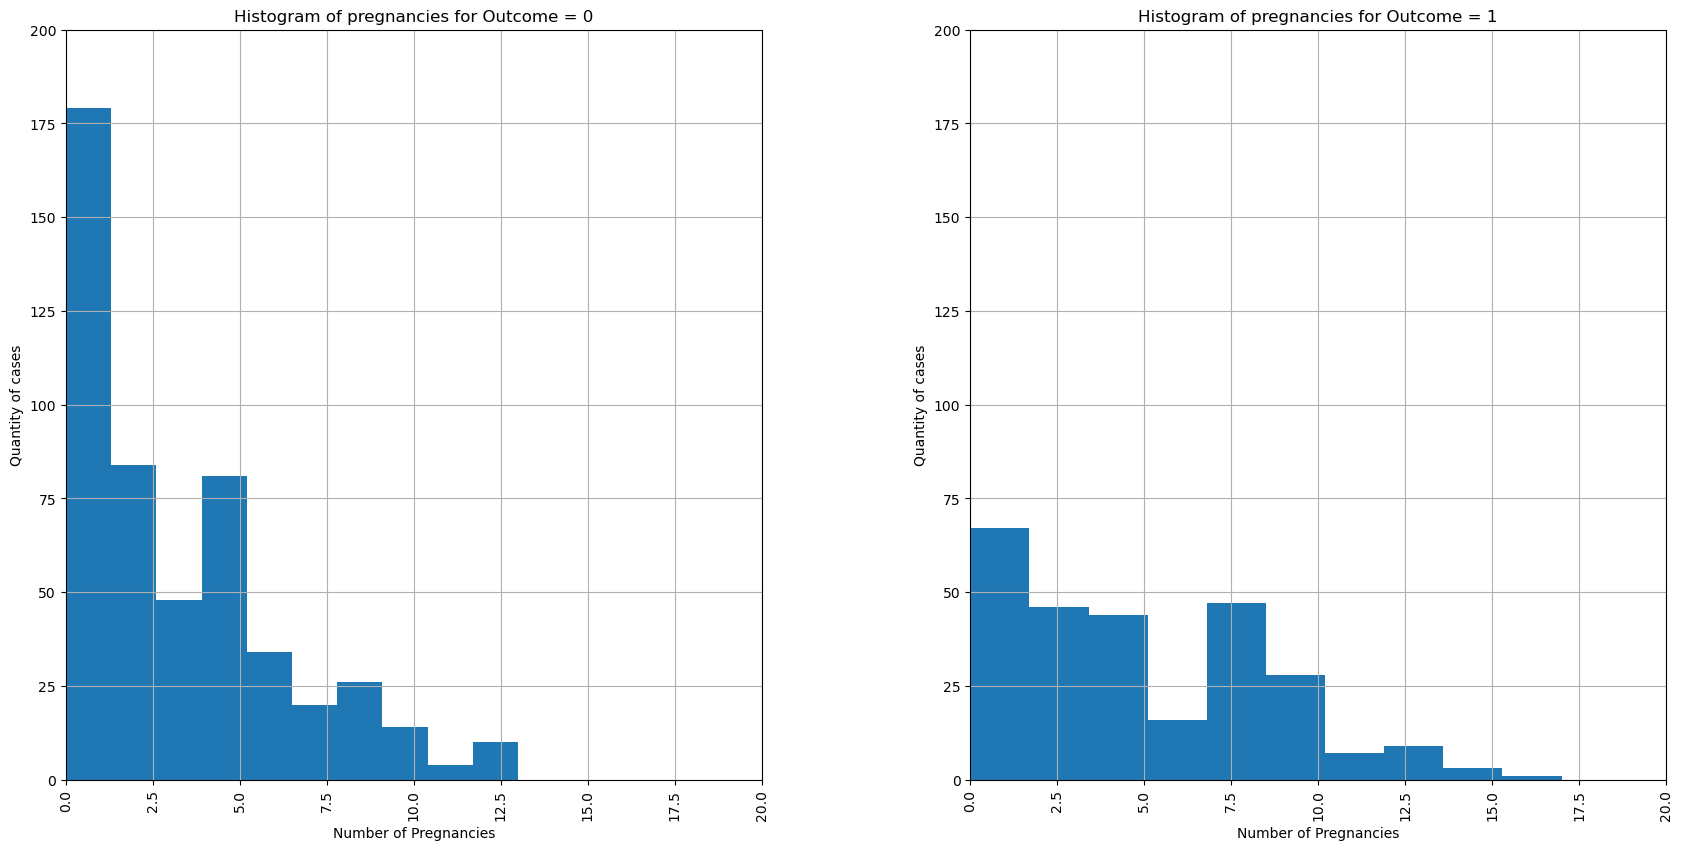

In [18]:
# histogram for pregnancies
# different histograms for Outcome = 1 and Outcome = 0

hist_preg = data.hist(column='Pregnancies', by='Outcome', bins=10, xlabelsize=None, figsize=(20,10));
hist_preg[0].grid(True)
hist_preg[0].set_xlim(0,20)
hist_preg[0].set_ylim(0,200)
hist_preg[0].set_xlabel('Number of Pregnancies')
hist_preg[0].set_ylabel('Quantity of cases')
hist_preg[0].set_title('Histogram of pregnancies for Outcome = 0')

hist_preg[1].grid(True)
hist_preg[1].set_xlim(0,20)
hist_preg[1].set_ylim(0,200)
hist_preg[1].set_xlabel('Number of Pregnancies')
hist_preg[1].set_ylabel('Quantity of cases')
hist_preg[1].set_title('Histogram of pregnancies for Outcome = 1');


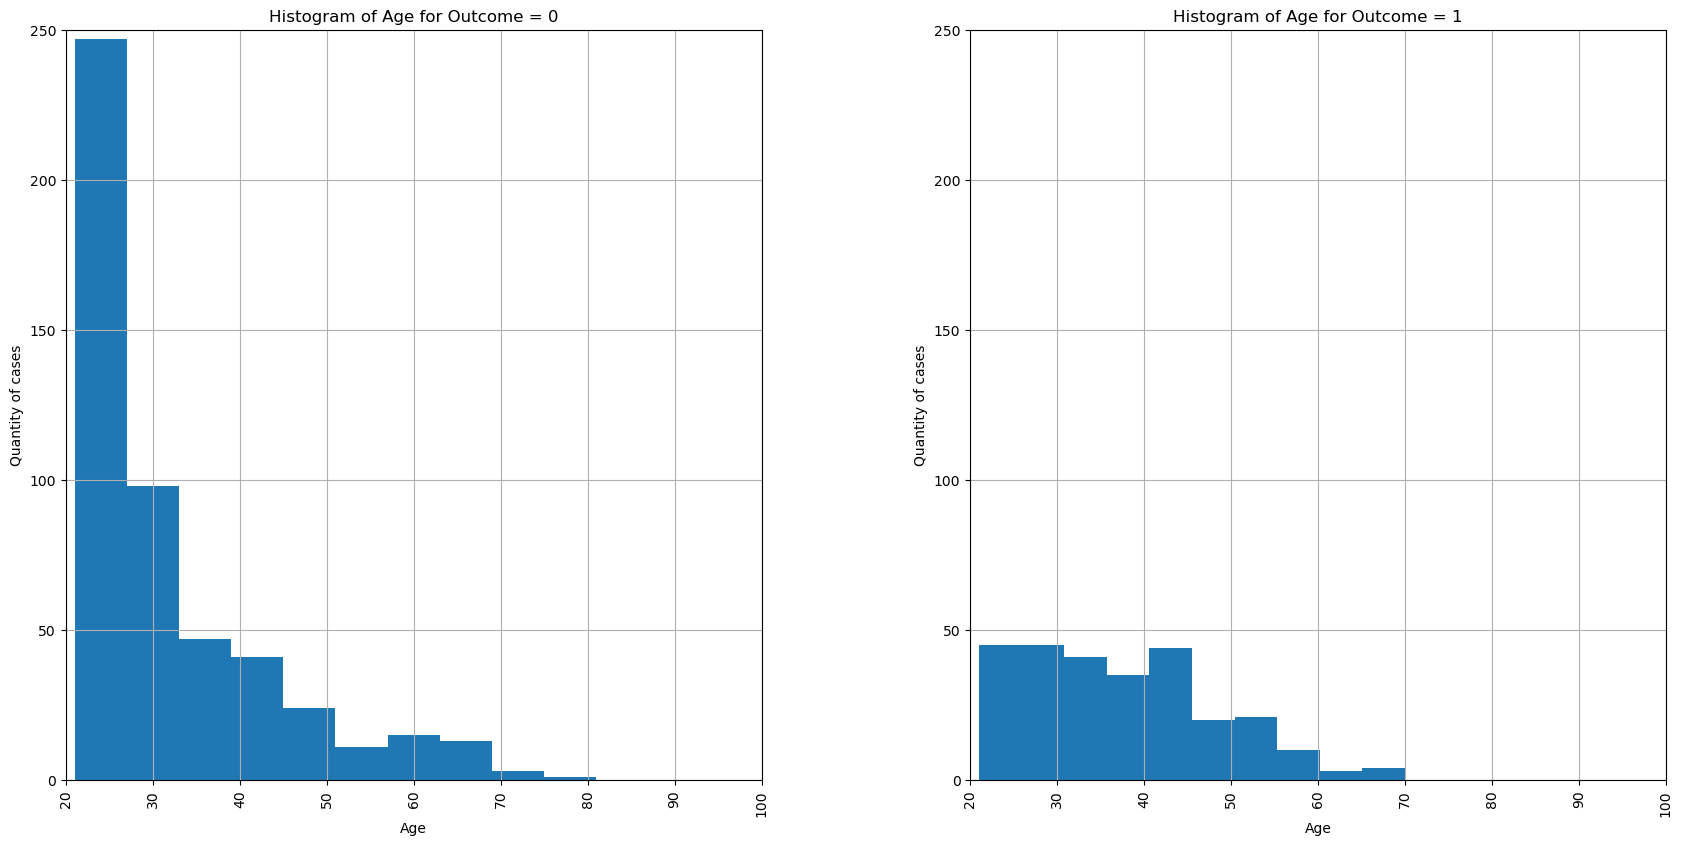

In [19]:
# histogram for Age
# different histograms for Outcome = 1 and Outcome = 0

hist_age = data.hist(column='Age', by='Outcome', bins=10, figsize=(20,10))
hist_age[0].grid(True)
hist_age[0].set_xlim(20,100)
hist_age[0].set_ylim(0,250)
hist_age[0].set_xlabel('Age')
hist_age[0].set_ylabel('Quantity of cases')
hist_age[0].set_title('Histogram of Age for Outcome = 0')

hist_age[1].grid(True)
hist_age[1].set_xlim(20,100)
hist_age[1].set_ylim(0,250)
hist_age[1].set_xlabel('Age')
hist_age[1].set_ylabel('Quantity of cases')
hist_age[1].set_title('Histogram of Age for Outcome = 1');

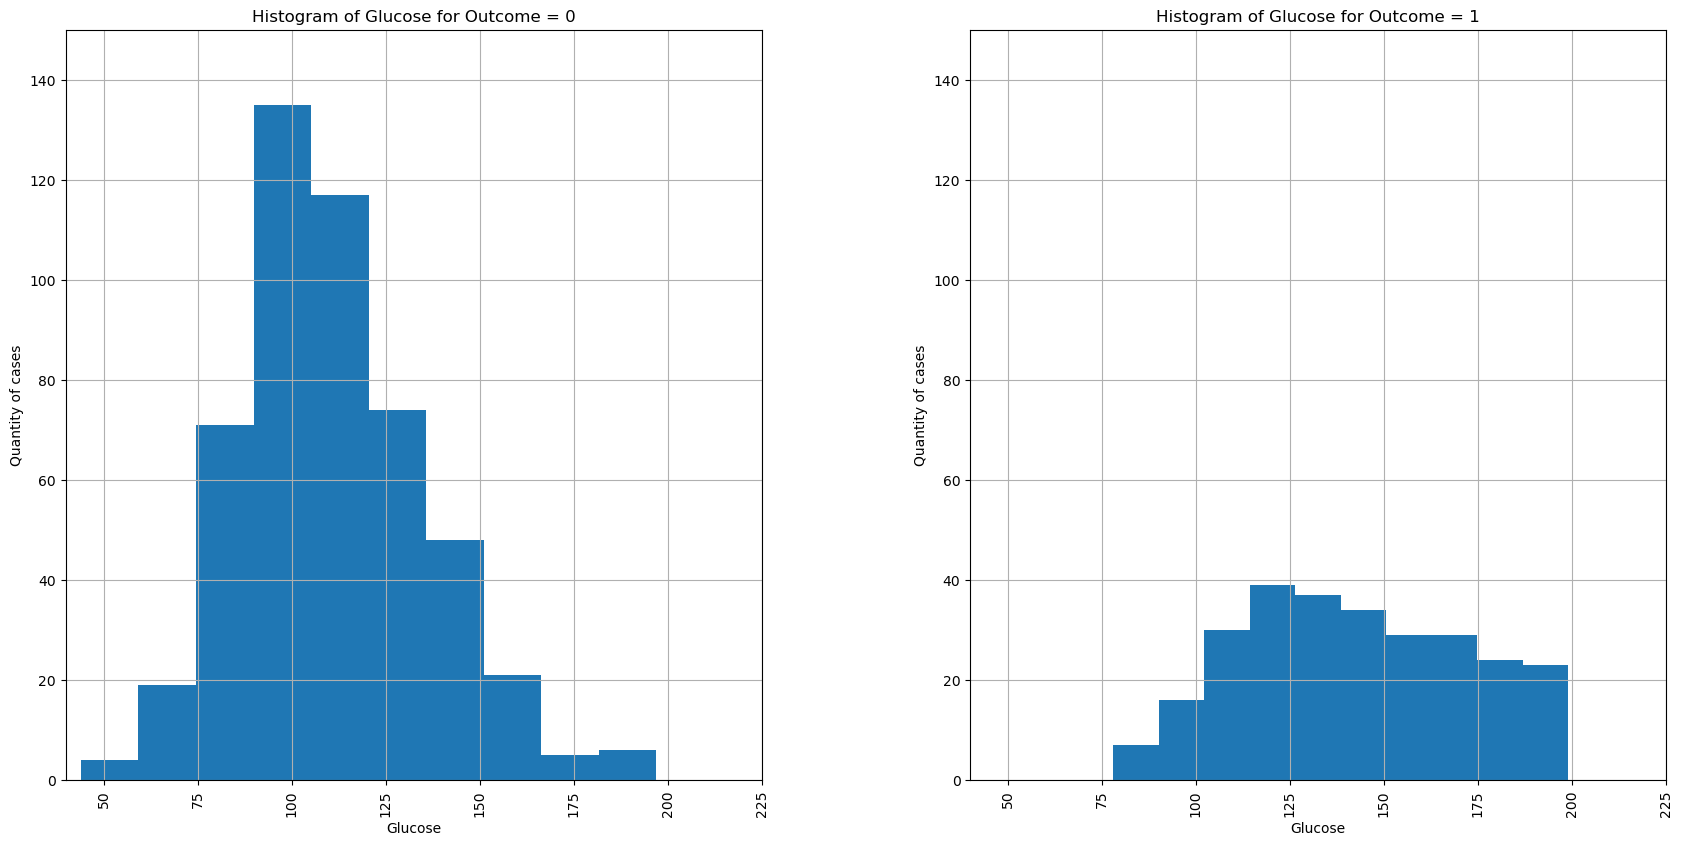

In [20]:
# histogram for Glucose
# different histograms for Outcome = 1 and Outcome = 0
hist_glucose = data.hist(column='Glucose', by='Outcome', bins=10, figsize=(20,10))
hist_glucose[0].grid(True)
hist_glucose[0].set_xlim(40,225)
hist_glucose[0].set_ylim(0,150)
hist_glucose[0].set_xlabel('Glucose')
hist_glucose[0].set_ylabel('Quantity of cases')
hist_glucose[0].set_title('Histogram of Glucose for Outcome = 0')

hist_glucose[1].grid(True)
hist_glucose[1].set_xlim(40,225)
hist_glucose[1].set_ylim(0,150)
hist_glucose[1].set_xlabel('Glucose')
hist_glucose[1].set_ylabel('Quantity of cases')
hist_glucose[1].set_title('Histogram of Glucose for Outcome = 1');

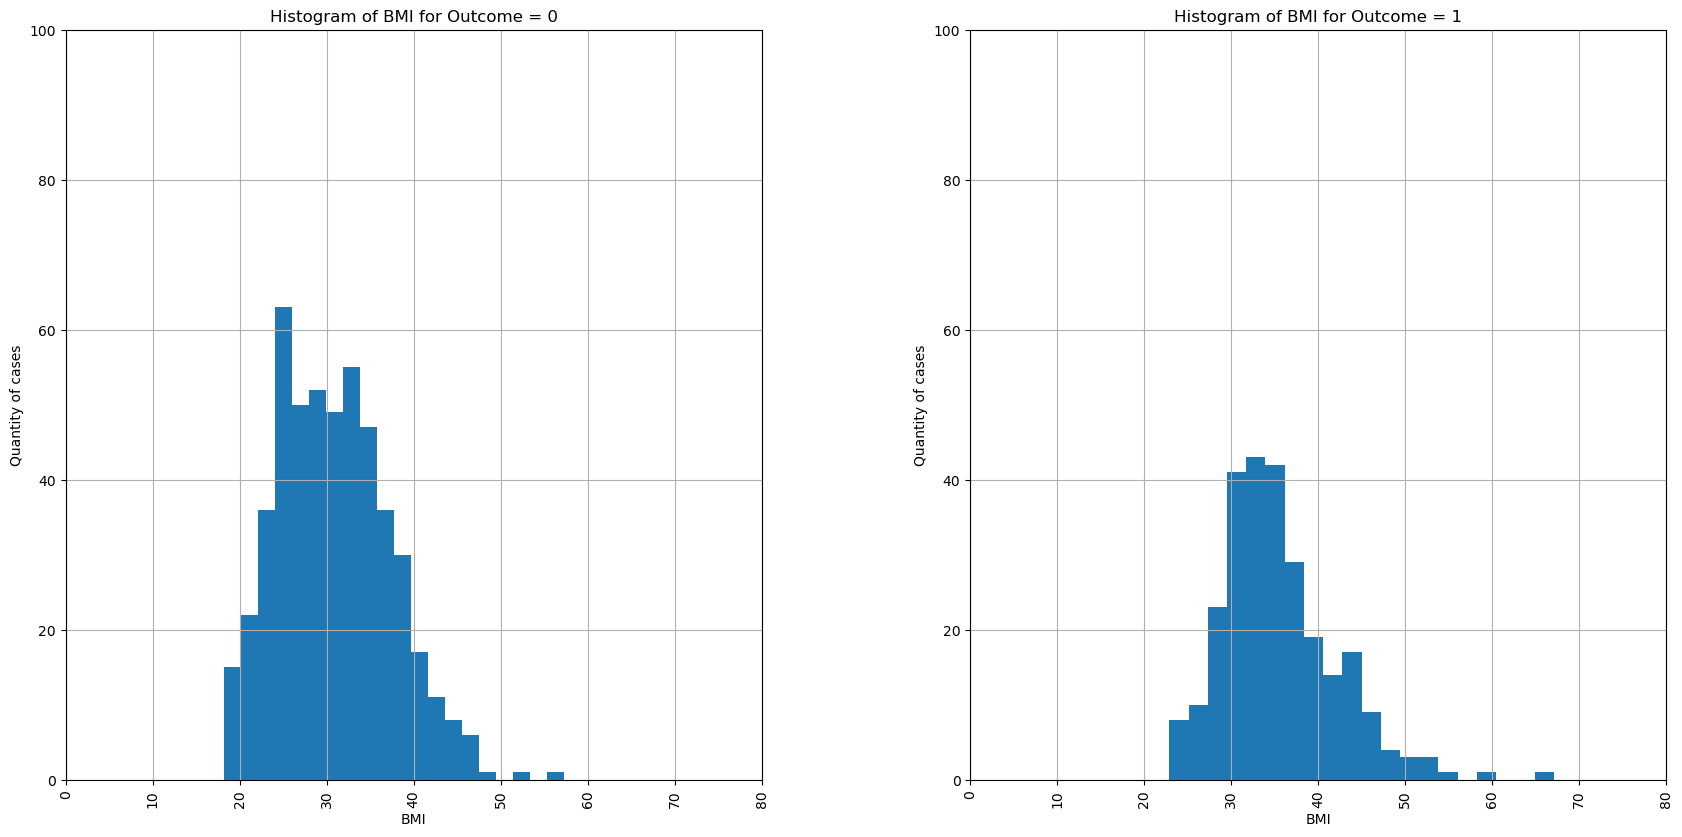

In [21]:
# histogram for BMI
# different histograms for Outcome = 1 and Outcome = 0
hist_BMI = data.hist(column='BMI', by='Outcome', bins=20, figsize=(20,10))

hist_BMI[0].grid(True)
hist_BMI[0].set_xlim(0,80)
hist_BMI[0].set_ylim(0,100)
hist_BMI[0].set_xlabel('BMI')
hist_BMI[0].set_ylabel('Quantity of cases')
hist_BMI[0].set_title('Histogram of BMI for Outcome = 0')

hist_BMI[1].grid(True)
hist_BMI[1].set_xlim(0,80)
hist_BMI[1].set_ylim(0,100)
hist_BMI[1].set_xlabel('BMI')
hist_BMI[1].set_ylabel('Quantity of cases')
hist_BMI[1].set_title('Histogram of BMI for Outcome = 1');

Histogram for outcome = 1 is always more to the right than for outcome = 0.

# Creating a model

Now I will try to create test and train data to train classification model and test its accuracy. So the next steps are:
* normalize the data
* create train and test data
* try to make a classification 
* test it and check the accuracy of the model

In [22]:
# import needed libraries form sklearn

# preprocessing to normalize the data
from sklearn import preprocessing

# test_train_split
from sklearn.model_selection import train_test_split

# K-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# metrics to check how accurate is the model
from sklearn import metrics

## Divide the data in parts for training and testing 

In [23]:
X = data[['Pregnancies', 'Glucose', 
          'BloodPressure', 'BMI', 
          'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 6) (537,)
Test set: (231, 6) (231,)


## Normalize the data

In [24]:
# normalize the data
normalizer = preprocessing.MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

## First training for the model

In [25]:
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat)

[0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0]


## Accuracy for the first model (k = 4)

In [26]:
print("Train set Accuracy: " + str(round(100 * metrics.accuracy_score(y_train, neigh.predict(X_train)), 2)) + "%")
print("Test set Accuracy:  " + str(round(100 * metrics.accuracy_score(y_test, yhat), 2)) + "%")

Train set Accuracy: 81.38%
Test set Accuracy:  75.32%


## Testing accuracy for different k

In [27]:
Ks = 30
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)

for n in range(1,Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = round(100 * metrics.accuracy_score(y_test, yhat), 2)
    std_acc[n-1] = round(100 * np.std(yhat==y_test)/np.sqrt(yhat.shape[0]), 2)

print(mean_acc)
print(std_acc)

[70.56 71.   72.29 75.32 74.89 75.76 73.16 75.76 74.89 76.62 77.92 78.79
 77.49 77.06 79.22 77.92 76.62 77.49 77.06 77.49 77.49 78.79 78.79 77.06
 77.49 77.06 77.49 78.35 78.35]
[3.   2.99 2.94 2.84 2.85 2.82 2.92 2.82 2.85 2.78 2.73 2.69 2.75 2.77
 2.67 2.73 2.78 2.75 2.77 2.75 2.75 2.69 2.69 2.77 2.75 2.77 2.75 2.71
 2.71]


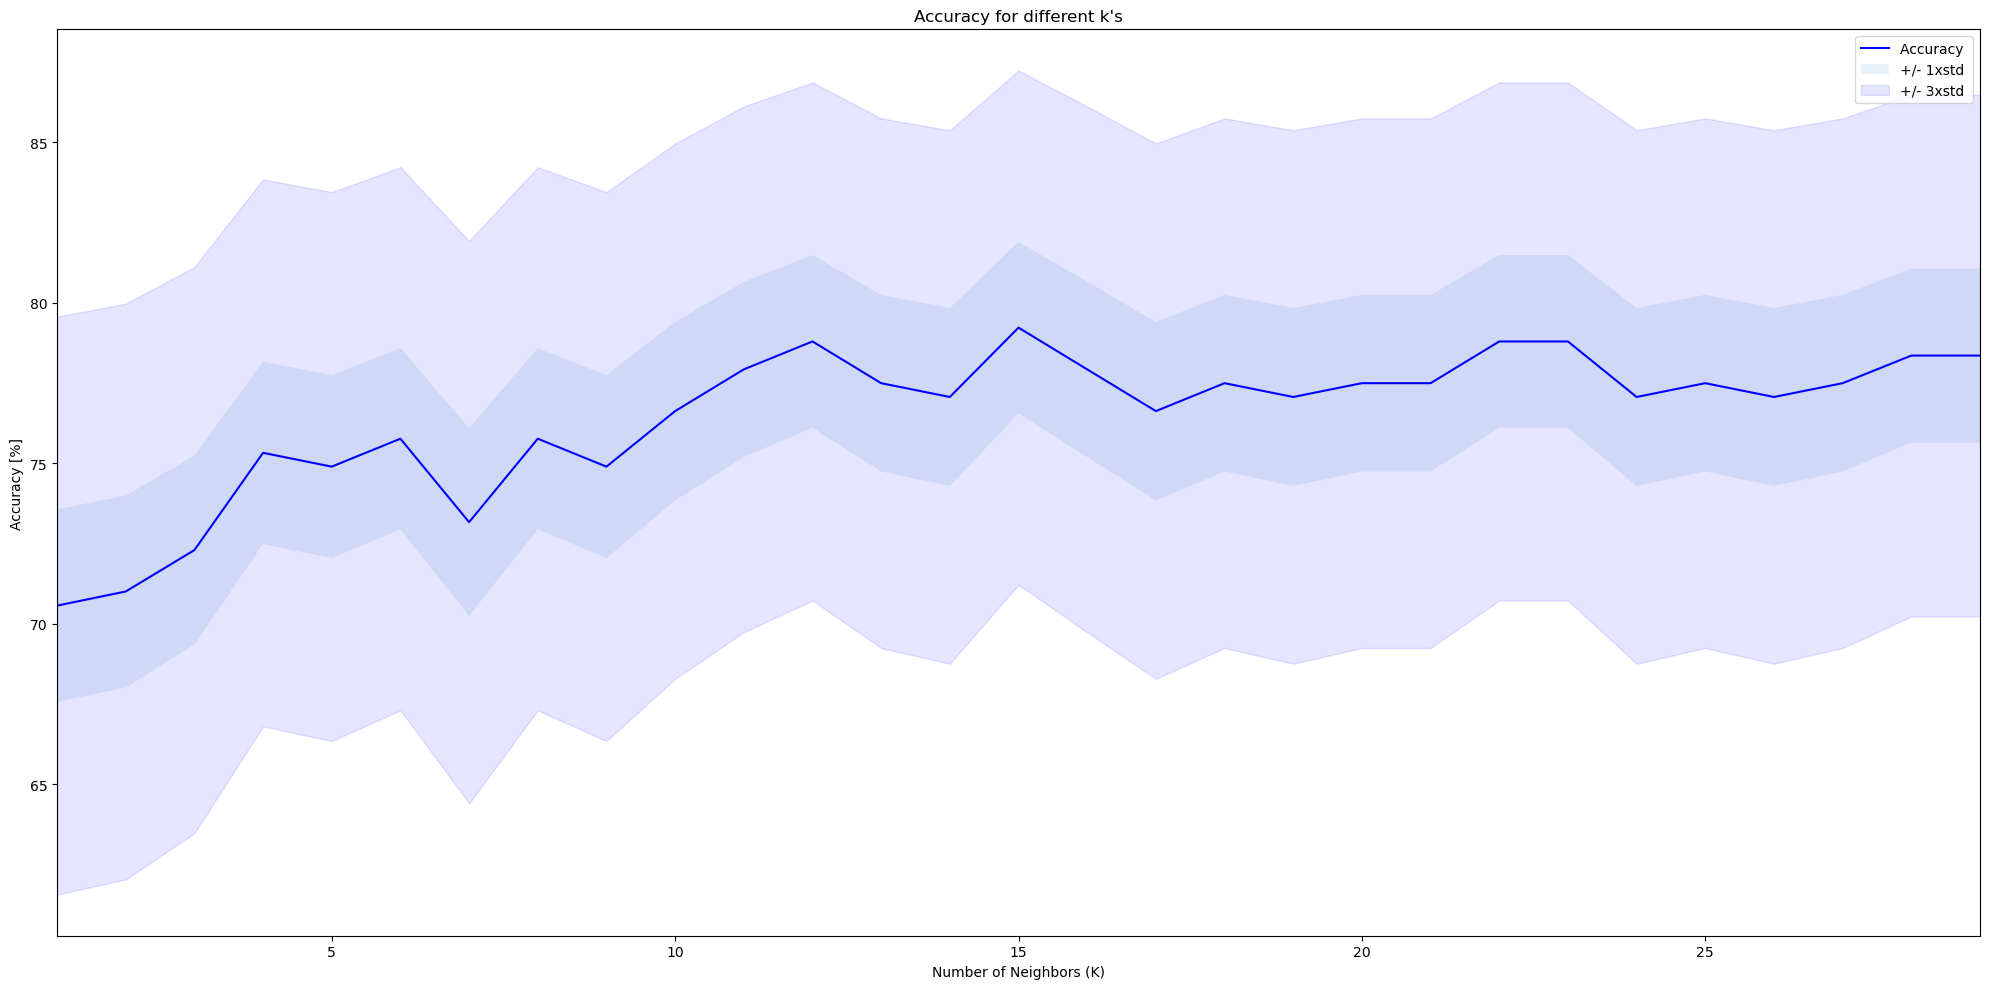

In [28]:
plt.figure(figsize=(20,10))
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy [%]')
plt.xlabel('Number of Neighbors (K)')
plt.xlim(1, Ks - 1)
plt.title("Accuracy for different k's")
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was " + str(mean_acc.max()) + "% for k = " + str(mean_acc.argmax() + 1) + ".") 

The best accuracy was 79.22% for k = 15.


# Conclusion

I managed to build a model with accuracy > 79%. The source of the model is k-neighbors algorithm. Best accuracy for test data was for k = 15.

This analysis was a try with exclusion of two columns which had a lot of NaNs in the original dataset. Comparing the result to result of diabetes_1, clearly the accuracy of the model is worse, so it is not worth excluding the data.